In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import numpy as np
import random


In [68]:
LOL_data = pd.read_csv("high_diamond_ranked_10min.csv")
del LOL_data["gameId"]
del LOL_data["redFirstBlood"]#for the model we wont need gameId column

In [69]:
LOL_data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [70]:
def basic_info(df):
    return {"shape":df.shape,
             "columns":list(df.columns),
             "Nas":df.isna().sum(),
             "info":df.info(),
             "describe":df.describe()}

In [71]:
#basic_info(LOL_data) 
#we have no missing values
#we can also see here some basics descriptive statistics and info about the features of the dataset.¿

In [72]:
print("Duplicates", len(LOL_data[LOL_data.duplicated()]))

Duplicates 0


There is nothing much to do about the clean process so let's proceed to do some EDA.

## EDA (Exploratory Data Analysis)

In [73]:
sns.set_style("whitegrid")
plt.style.use("ggplot")

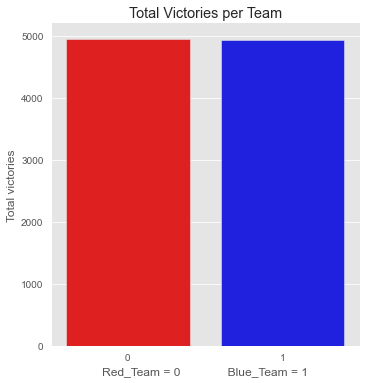

blueWins
0    4949
1    4930
dtype: int64

In [74]:
ax = sns.catplot(x="blueWins",data=LOL_data,palette=["r","b"],kind="count")
plt.ylabel("Total victories")
plt.xlabel("Red_Team = 0              Blue_Team = 1")
plt.title("Total Victories per Team")
plt.show()

LOL_data.value_counts("blueWins")

Red team won 19 games more than blue team, this just for the approx 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER) 

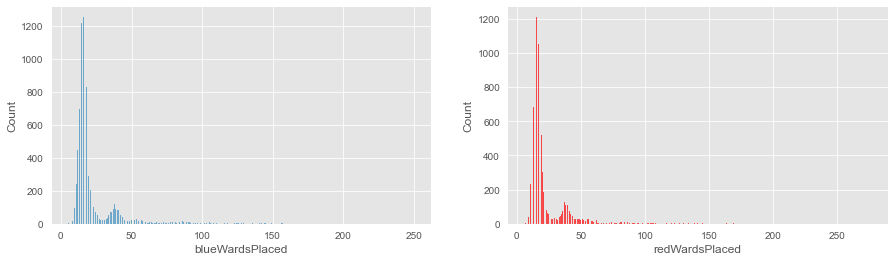

In [75]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.histplot(x="blueWardsPlaced",data=LOL_data,ax = ax[0])
sns.histplot(x="redWardsPlaced",data=LOL_data,ax = ax[1],color="r")
plt.show()

#its nor normal to place more than 15 wards within the first ten min. and more than that is really strange we have some ouliers here
#lets deal with it


In [76]:
def outliers(x):
    if x > 15:
        x = random.randint(1,15)
    return x
LOL_data["blueWardsPlaced"] = LOL_data["blueWardsPlaced"].apply(outliers)
LOL_data["redWardsPlaced"] = LOL_data["redWardsPlaced"].apply(outliers)

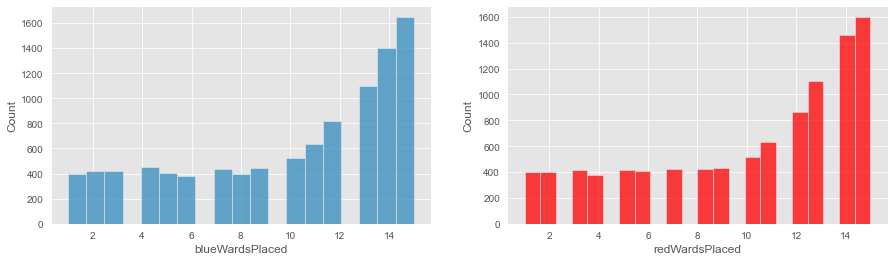

In [77]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.histplot(x="blueWardsPlaced",data=LOL_data,ax = ax[0])
sns.histplot(x="redWardsPlaced",data=LOL_data,ax = ax[1],color="r")
plt.show()

The following code is to create some visualizations, if you want to see them uncomment and run. Are some pairplot figures. comparing some features of the datasets, and its correleation and distribution.

In [78]:
"""
x_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]
y_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]
sns.pairplot(data=LOL_data,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"],diag_kind="hist")
plt.show()
"""

'\nx_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]\ny_vars = ["blueKills","blueTotalGold","blueTotalExperience","redKills","redTotalGold","redTotalExperience"]\nsns.pairplot(data=LOL_data,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"],diag_kind="hist")\nplt.show()\n'

As a league of legends player, it might not surprise the graph above, where the more gold, kills, and experience a team has per game, the more are the chances to win.

kill the enemy is just one way to get experience, killing minions, wards, and the monsters are some other, I will review more features.

In [79]:
"""
x_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]
y_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]
sns.pairplot(data=LOL_data,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"])
plt.show()
"""

'\nx_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]\ny_vars = ["blueWardsPlaced","blueAssists","blueTotalMinionsKilled","redWardsPlaced","redAssists","redTotalMinionsKilled"]\nsns.pairplot(data=LOL_data,x_vars=x_vars,y_vars=y_vars,hue="blueWins",corner=True,markers=["o","s"])\nplt.show()\n'

## Modelling

#### A Basic feature engineering added
In league of legends we can add a feature calles KDA which is represented as KDA = (Kills + Assists) / Deaths
I have decided to add this to each team within the dataset.

In [80]:
LOL_data["blue_KDA"] = round((LOL_data["blueKills"] + LOL_data["blueAssists"] / LOL_data["blueDeaths"]),2)
LOL_data["blue_KDA"] = LOL_data.fillna(0) #2 blue teams had no KDA within the first 10 minutes


LOL_data["red_KDA"] = round((LOL_data["redKills"] + LOL_data["redAssists"] / LOL_data["redDeaths"]),2)
LOL_data["red_KDA"] = LOL_data.fillna(0)

LOL_data.shape
#LOL_data.info()

(9879, 40)

In [81]:
LOL_data.describe()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blue_KDA,red_KDA
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,10.070048,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,...,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140,0.499038,0.499038
std,0.500024,4.448981,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,...,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841,0.500024,0.500024
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000,0.000000
25%,0.000000,6.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000,0.000000,0.000000
50%,0.000000,12.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000,0.000000,0.000000
75%,1.000000,14.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000,1.000000,1.000000
max,1.000000,15.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,1.000000,1.000000


In [82]:
y = LOL_data["blueWins"]

X = LOL_data.drop("blueWins",axis=1)

#### Feature selection
I would like to use some Featureselection using random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [84]:
SEED = 42

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=SEED,stratify=y)

In [86]:
rf = RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)
rf.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=0.12, n_estimators=400, random_state=42)

In [87]:
#selected_features = X_train.columns[rf.get_support()]
#print(selected_features)

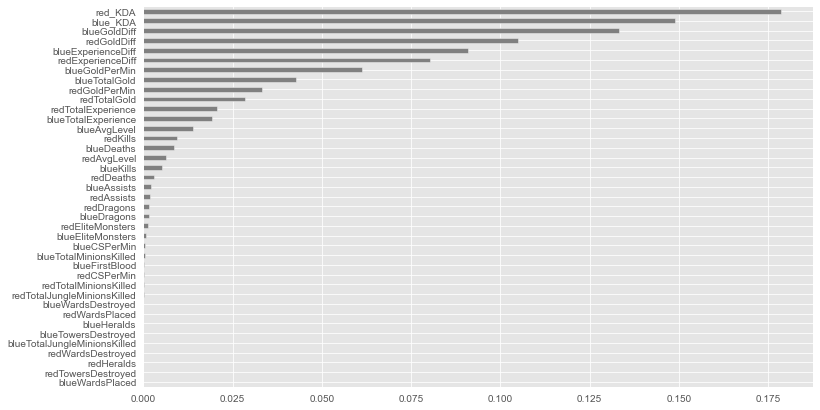

In [88]:
plt.figure(figsize=(12,7))
pd.Series(rf.feature_importances_,index=X.columns).sort_values().plot(kind="barh",color="gray")
plt.show()

In [89]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
most_important_features = list(feature_importances.index[:24])
most_important_features

['red_KDA',
 'blue_KDA',
 'blueGoldDiff',
 'redGoldDiff',
 'blueExperienceDiff',
 'redExperienceDiff',
 'blueGoldPerMin',
 'blueTotalGold',
 'redGoldPerMin',
 'redTotalGold',
 'redTotalExperience',
 'blueTotalExperience',
 'blueAvgLevel',
 'redKills',
 'blueDeaths',
 'redAvgLevel',
 'blueKills',
 'redDeaths',
 'blueAssists',
 'redAssists',
 'redDragons',
 'blueDragons',
 'redEliteMonsters',
 'blueEliteMonsters']

In [90]:
X_train = X_train[most_important_features]
X_test = X_test[most_important_features]
print(X_train.shape,X_test.shape)

(7903, 24) (1976, 24)


## KNN
lets start for the basics

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

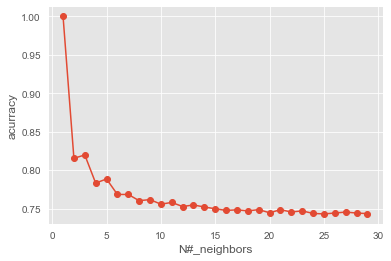

In [92]:
k_range = range(1,30)
scores = list()
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_train,y_train))
plt.plot(k_range,scores,marker="o")
plt.ylabel("acurracy")
plt.xlabel("N#_neighbors")
plt.show()

In [93]:
knn =  KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(y_test,y_pred_knn))

#we can see that we have an overfitting problem, the data is having an accuracy score of 100% with a number of neighbors = 1, but when we test it on new data it doesn't have a good performance

0.6351214574898786
